# 神经网络初步 
> + 任务 5：使用神经网络解决实际问题
>> + 本节我们利用神经网络擅长解决的图像识别问题来进行实践操作。
>> + fashion-mnist  服饰数据集

>> + <img src="./imgs/chap11/fig11_16.png" width=80%>

## 分析fashion-mnist数据集
>> + fashion-mnist数据集是一个用来训练图像处理系统的服饰数据集，它共包含70000幅服饰的数字图像，
>> + 其中60000幅是训练数据，10000幅是验证数据，
>> + 另外它对衣服和鞋子等做了分类，并使用字段label作为分类标签，其值为0-9。                                   

>> + <img src="./imgs/chap11/fig11_17.png" width=80%>


> * 【示例】加载数据集


In [1]:
## 三剑客
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
#导入MLP神经网络
from sklearn.neural_network import MLPClassifier

#导入数据集拆分工具
from sklearn.model_selection import train_test_split

#使用pandas载入数据集，把路径替换为数据集存放路径
data_path = "./dataSets/fashion-mnist/fashion-mnist_train.csv"
data = pd.read_csv(data_path, sep = ',')
#显示数据集key值
data.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [7]:
#打印样本数量和训练特征数
print('样本数量：{}, 样本特征数：{}'.format(data.shape[0], data.shape[1]))

样本数量：60000, 样本特征数：785


In [8]:
# 查看前5个样本
data[:5]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> * ↑ fashion-mnist数训练集包含两种数据：
>> * 一种是数据的分类标签（`label`）
>> * 一种是`[piexl1],......[piexl784]`数据特征，共784个（数据集图片信息：28像素×28像素=784）         

> + 784个`[piexl1],......[piexl784]`数据特征存储的是无符号的8位整型数组（对应十进制0~255），用来表示灰度值。   
> + 为了让特征的数值更利于建模，我们把特征向量的值全部除以255，这样全部数值范围为0~1。
> + 同时为了控制训练时长，我们从训练集中随机选用6000个样本作为训练集，1200个样本作为验证集。

> + 【示例】分割训练集和验证集并进行数据处理

In [9]:
#将分类标签字段删除
X = data.drop(['label'], axis = 1)
y = data['label']

#建立训练数据集和验证数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 6000, 
                                                    test_size=1200, 
                                                    random_state=42)

#特征向量的值全部除以255，使数值在0和1之间
X_train = X_train / 255.
X_test = X_test / 255.

## 训练MLP神经网络
> * 【示例】训练神经网络模型并对模型进行评分

In [10]:
#设置神经网络的隐藏层为两个100个节点
mlp_2layers = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,100],
                            activation='relu', alpha = 1e-6,random_state=42)
#使用数据训练神经网络模型
mlp_2layers.fit(X_train,y_train)

#打印模型分数
print('验证数据集得分：{:.2f}%'.format(mlp_2layers.score(X_test,y_test)*100))

验证数据集得分：84.25%


In [11]:
print('MLPClassifier:hidden_layer_sizes=[100,100] 得分：{:.2f}%'.format(mlp_2layers.score(X_train,y_train)*100))

MLPClassifier:hidden_layer_sizes=[100,100] 得分：94.73%


↑ 对以上模型来讲，训练集得分为94.73%,而测试集上是84.25%，你如何对该模型评判？？ 如何调整呢？

## 使用模型进行图像识别

> * 【示例】将分类标签存储到字典并创建函数，获得测试对应结果

In [12]:
#建立分类标签描述字典
class_t = [
    "0：T-shirt/top(T恤)",
    "1：Trouser(裤子)",
    "2：Pullover(套衫)",
    "3：Dress(裙子)",
    "4：Coat(外套)",
    "5：Sandal(凉鞋)",
    "6：Shirt(衬衫)",
    "7：Sneaker(运动鞋)",
    "8：Bag(包)",
    "9：AnkleBoot(踝靴)"
]

#根据输入的衣物数字，返回衣物的分类描述，可以显示分类后的衣物描述
def get_label_class(label):
    return class_t[label]

#测试分类描述结果
get_label_class(4)

'4：Coat(外套)'

> * 【示例】在训练集中随机选择一个样本，并图显，做为验证模型的样本

测试数据集的大小(shape)： (10000, 785)
随机选取第493个样本


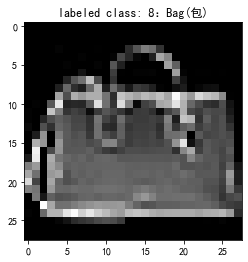

In [19]:
import matplotlib.pyplot as plt
import random

# 打开test文件
data_test_path = "./dataSets/fashion-mnist/fashion-mnist_test.csv"
test_data = pd.read_csv(data_test_path)

# 打印test_data形状
print("测试数据集的大小(shape)：",test_data.shape)

# 随机从test_data中取个样本
tst_idx = random.randint(0, test_data.shape[1])
print("随机选取第{}个样本".format(tst_idx))
sample = np.reshape(test_data[test_data.columns[1:]].iloc[tst_idx].values, (28,28))

# 进行图显
plt.figure()
plt.title("labeled class: {}".format(get_label_class(test_data["label"].iloc[tst_idx])))
plt.imshow(sample, 'gray')

> * 【示例】利用以上图像进行模型验证
>> + 注意：需要将待验证的图像转换为模型可以读取的numpy数组，并进行归一处理

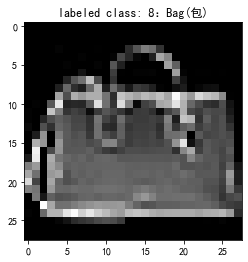

In [21]:
# 进行归一化处理
#sample = np.reshape(test_data[test_data.columns[1:]].iloc[tst_idx].values/255, (28,28))
sample = sample/255
plt.figure()
plt.title("labeled class: {}".format(get_label_class(test_data["label"].iloc[tst_idx])))
plt.imshow(sample, 'gray')

In [22]:
type(sample)

numpy.ndarray

In [23]:
sample.shape

(28, 28)

In [24]:
# 以需要进行reshape操作,转成一维数组arr，输入到预测模型中
arr1 = np.array(sample).reshape(1,-1)

#进行图像识别
ret_class = mlp_2layers.predict(arr1)[0]
print('对图片中识别出的分类是：[{}]'.format(get_label_class(ret_class)))

对图片中识别出的分类是：[8：Bag(包)]


↑ 以上是从验证集中随机选取的一个样本，从数据验证数据集上的准确率得分：84.25%看，效果一般般，但随机选择的绝大部分都能判断对。抛开测试集，用一张独立的图片来测试一下，看模型的预测效果。

> * 【示例】利用训练好的模型对自定义的图片进行预测

对图片中识别出的分类是：[9：AnkleBoot(踝靴)]


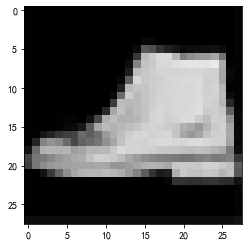

In [27]:
#导入numpy
import numpy as np

#导入图像处理工具
from PIL import Image

#打开图像
imag_path = "./dataSets/fashion-mnist/test/9/AnkleBoot2.png"
image=Image.open(imag_path).convert('F')

#调整图像的大小
image = image.resize((28,28))
arr=[]
#将图像中的像素作为预测数据点的特征
for i in range(28):
    for j in range(28):
        pixel = float(image.getpixel((j,i)))/255.
        arr.append(pixel)

#将以上二维数组，进行reshape操作后，将数据输入到预测模型中
arr1 = np.array(arr).reshape(1,-1)

#进行图像识别
ret_class=mlp_2layers.predict(arr1)[0]
print('对图片中识别出的分类是：[{}]'.format(get_label_class(ret_class)))

# 显示图片image
plt.figure()
plt.imshow(image, 'gray')

In [29]:
# 查看当前路径
import os
os.getcwd()

'D:\\JupyterProjects\\00_sklearn202209'

In [31]:
# 查看路径下的文件
imag_path = "./dataSets/fashion-mnist/test/9"
os.listdir(imag_path)

['AnkleBoot1.png', 'AnkleBoot2.png']

## 小结
> + 1、神经网络是一种算法结构，它让机器能够进行自我学习。
> + 2、神经网络可以从超大数据集中读取信息并且能够建立非常复杂的模型，因此在计算能力充足并且参数设置合适的情况下，神经网络可以比其他的机器学习算法表现的更优异。
> + 3、神经网络的缺点有模型训练的时间相对更长、对计算性能的要求相对更高。
> + 4、神经网络模型中的参数调节是常用的优化手段，尤其是调整隐藏层的数量和隐藏层中节点的数量。
